<a href="https://colab.research.google.com/github/lynnkuan/python/blob/main/2330MR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('2330TEJ.csv')
data.rename(columns={'65d_SMA':'price'},inplace=True)
data.head()

,date,1M_high,3M_high,6M_high,9M_high,1Y_high,1M_low,3M_low,6M_low,9M_low,...,SMA_750d,SMA_1250d,SMA_2500d,vol_55d_max,vol_65d_max,vol_240d_max,extra_1,extra_2,extra_3,extra_4
0,2024-10-18,1085.0,1085.0000,1085.0000,1085.0000,1085.0000,957.0,811.3724,735.8533,617.9290,...,4.711156e+07,4.674301e+07,4.313762e+07,3.363233e+07,2.272338e+07,2.140464e+07,1.384897e+07,159662.795,159662.795,176166.037
1,2024-10-17,1070.0,1070.0000,1075.1929,1075.1929,1075.1929,941.0,811.3724,735.8533,580.4189,...,4.639698e+07,4.573941e+07,4.268644e+07,3.328967e+07,2.260421e+07,2.132834e+07,1.381084e+07,159662.795,159662.795,176166.037
2,2024-10-16,1070.0,1070.0000,1075.1929,1075.1929,1075.1929,941.0,811.3724,735.8533,573.5092,...,4.631153e+07,4.520412e+07,4.248195e+07,3.311630e+07,2.253870e+07,2.129197e+07,1.379059e+07,159662.795,159662.795,176166.037
3,2024-10-15,1070.0,1070.0000,1075.1929,1075.1929,1075.1929,941.0,811.3724,735.8533,572.5221,...,4.620621e+07,4.490201e+07,4.218943e+07,3.290072e+07,2.246822e+07,2.124772e+07,1.376794e+07,159662.795,159662.795,176166.037
4,2024-10-14,1045.0,1050.3042,1075.1929,1075.1929,1075.1929,941.0,811.3724,735.8533,572.5221,...,4.607861e+07,4.467899e+07,4.192664e+07,3.273591e+07,2.241006e+07,2.120631e+07,1.374866e+07,159662.795,159662.795,176166.037


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 72 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          300 non-null    object 
 1   1M_high       300 non-null    float64
 2   3M_high       300 non-null    float64
 3   6M_high       300 non-null    float64
 4   9M_high       300 non-null    float64
 5   1Y_high       300 non-null    float64
 6   1M_low        300 non-null    float64
 7   3M_low        300 non-null    float64
 8   6M_low        300 non-null    float64
 9   9M_low        300 non-null    float64
 10  55d_SMA       300 non-null    float64
 11  price         300 non-null    int64  
 12  72d_SMA       300 non-null    float64
 13  125d_SMA      300 non-null    float64
 14  250d_SMA      300 non-null    float64
 15  750d_SMA      300 non-null    float64
 16  1250d_SMA     300 non-null    float64
 17  2500d_SMA     300 non-null    float64
 18  vol_55d       300 non-null    

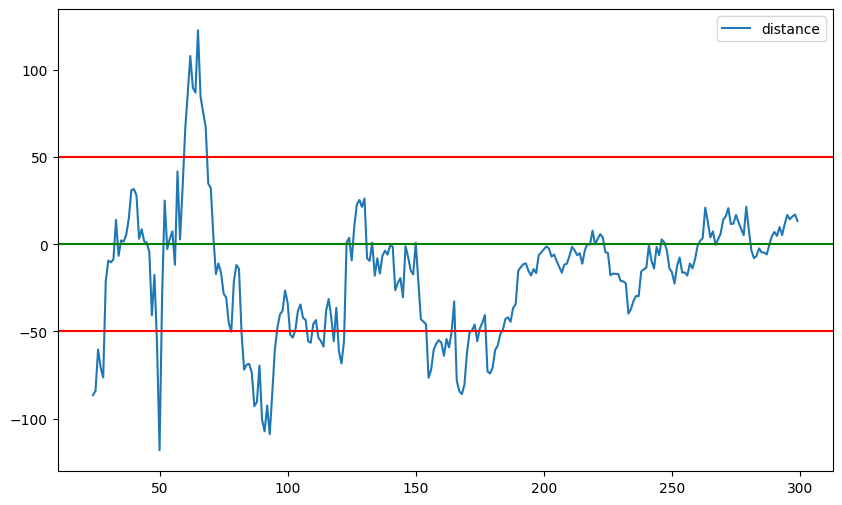

In [5]:
data['returns'] = np.log(data['price']/data['price'].shift(1))
SMA = 25
data['SMA'] = data['price'].rolling(SMA).mean() #計算趨勢路徑
threshold = 50     #信號生成
data['distance'] = data['price'] - data['SMA'] #計算偏離距離
data['distance'].dropna().plot(figsize=(10,6),legend=True)

plt.axhline(threshold,color='r')   #畫出所有偏離距離
plt.axhline(-threshold,color='r')
plt.axhline(0,color='g')
plt.show()

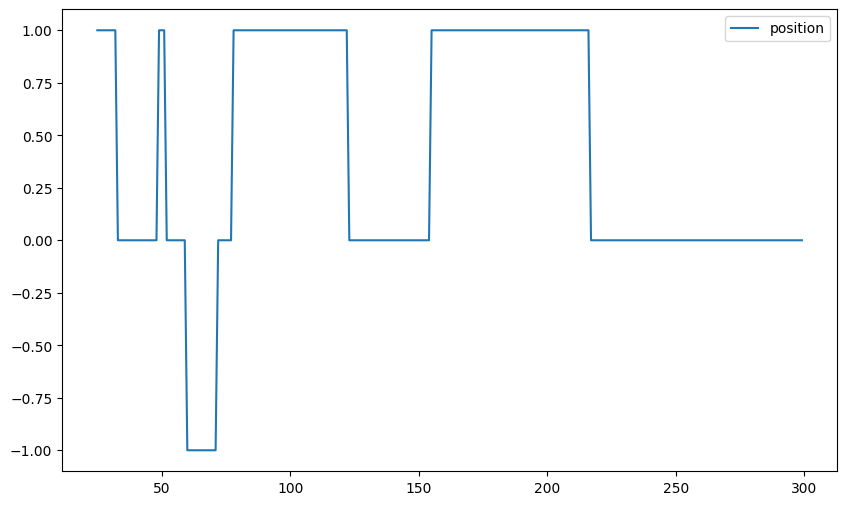

In [8]:
data['position'] = np.where(data['distance']>threshold,-1,np.nan)
data['position'] = np.where(data['distance']<-threshold,1,data['position'])
data['position'] = np.where(data['distance']*data['distance'].shift(1)<0,0,data['position'])   #市場中立
data['position'] = data['position'].ffill().fillna(0)


data['position'].iloc[SMA:].plot(ylim=[-1.1,1.1],figsize=(10,6),legend=True)
plt.show()

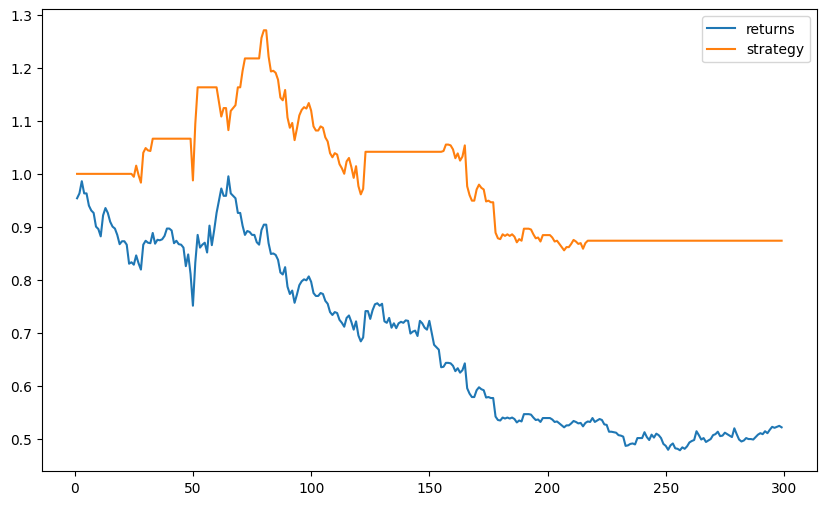

In [11]:
data['strategy'] = data['position'].shift(1)*data['returns']
data[['returns','strategy']].dropna().cumsum().apply(np.exp).plot(figsize=(10,6))
plt.show()